# 数据科学-概率学

## 概率密度函数和累积分布函数

### 概率密度函数（Probability Density Function, PDF）

**概率密度函数**是用来描述连续型随机变量的概率分布的函数。它表示随机变量落在某一特定取值附近的概率密度。

**关键点：**

* **非负性：** PDF的值总是大于等于0。
* **归一性：** PDF在整个定义域上的积分等于1，即概率总和为1。
* **概率密度，而非概率：** PDF的值本身并不是概率，而是概率密度。要计算随机变量落在某一区间内的概率，需要对该区间上的PDF进行积分。

**直观理解：**
* PDF的图像可以看作是一个曲线，曲线下的面积代表概率。
* 曲线越高的地方，随机变量落在该处附近的概率越大。

**数学表示：**
```
f(x) >= 0
∫f(x)dx = 1
```

### 累积分布函数（Cumulative Distribution Function, CDF）

**累积分布函数**表示随机变量小于等于某个值的概率。它给出了随机变量取值小于等于x的概率。

**关键点：**

* **单调递增：** CDF的值随着x的增大而单调递增。
* **范围：** CDF的值在0到1之间。
* **概率：** CDF(x)表示随机变量X小于等于x的概率。

**直观理解：**
* CDF的图像是一条从0到1的曲线。
* 曲线上的每个点表示随机变量小于等于对应x值的概率。

### PDF和CDF的关系

* **CDF是PDF的积分：** CDF是PDF从负无穷大到x的积分。
* **PDF是CDF的导数：** 在PDF连续的点上，PDF是CDF的导数。

### 示例：正态分布

正态分布是一种常见的连续型概率分布。它的PDF呈钟形曲线，CDF是一条S形曲线。

## 随机采样

### **逆变换采样法**

* **原理：**
  * 计算概率密度函数的累积分布函数（CDF）。
  * 生成一个[0, 1]之间的均匀分布随机数。
  * 将这个均匀分布随机数作为CDF的输入，求解对应的x值，这个x值就是我们想要的随机数。

* **代码示例：**

```python
import numpy as np
import matplotlib.pyplot as plt

# 自定义概率密度函数
def my_pdf(x):
    return 0.5 * np.exp(-np.abs(x))

# 计算累积分布函数（假设有解析解）
def my_cdf(x):
    return 0.5 * (1 + np.sign(x) * (1 - np.exp(-np.abs(x))))

# 逆变换采样
def inverse_transform_sampling(n):
    u = np.random.uniform(size=n)
    x = np.log(2*u - 1) * np.sign(u - 0.5)
    return x

# 生成1000个随机数
samples = inverse_transform_sampling(1000)

# 绘制直方图
plt.hist(samples, bins=50, density=True)
plt.show()
```

### **拒绝采样法**

* **原理：**
  * 定义一个容易采样的分布作为提议分布。
  * 从提议分布中采样一个点。
  * 根据自定义分布和提议分布的比值，决定是否接受该采样点。
  * 重复上述过程，直到采样到足够多的点。

* **代码示例：**

```python
# 拒绝采样
def rejection_sampling(n):
    samples = []
    while len(samples) < n:
        x = np.random.randn()  # 提议分布为标准正态分布
        u = np.random.uniform(0, 1)
        if u <= my_pdf(x) / (0.4 * np.exp(-x**2/2)):
            samples.append(x)
    return np.array(samples)
```

* **对一整个数组进行拒绝采样的原理:** `np.random.choice` 函数可以从一个一维数组中随机抽取元素，每个元素被抽中的概率与其在数组中对应的值成正比。
* **用法:**
    ```python
    import numpy as np

    # 假设 probs 是一个表示概率的数组
    samples = np.random.choice(np.arange(len(probs)), size=num_samples, p=probs)
    ```
* **完整代码示例**

    ```python
    import numpy as np

    def custom_pdf(x):
        # 自定义的概率密度函数
        return np.exp(-x**2)

    # 参数设置
    min_val = -5
    max_val = 5
    num_samples = 1000
    num_candidates = 10 * num_samples  # 候选样本数量

    # 均匀随机采样候选样本
    candidates = np.linspace(min_val, max_val, num_candidates)

    # 计算每个候选样本的概率密度
    probs = custom_pdf(candidates)

    # 归一化概率
    probs /= probs.sum()

    # 使用 np.random.choice 采样
    indices = np.random.choice(np.arange(len(probs)), size=num_samples, p=probs)

    # 获取最终的样本
    samples = candidates[indices]

    # 可视化结果
    import matplotlib.pyplot as plt
    plt.hist(samples, bins=50, density=True)
    plt.show()
    ```

### **MCMC采样**

MCMC（Markov Chain Monte Carlo）是一种强大的随机采样方法，广泛应用于统计学、机器学习等领域。它能够从复杂的概率分布中生成样本，即使这个分布的概率密度函数很难直接计算。

**MCMC的基本原理**

MCMC的核心思想是构建一个马尔可夫链，使得这个马尔可夫链的平稳分布就是我们想要采样的目标分布。也就是说，经过足够多次的迭代后，马尔可夫链的状态就会收敛到目标分布。

**MCMC算法的一般步骤：**

1.  **初始化：** 随机选取一个初始状态。
2.  **迭代：**
      * 根据当前状态，产生一个新的候选状态。
      * 计算接受概率：根据目标分布和当前状态、候选状态，计算一个接受概率。
      * 决策：
          * 如果接受概率大于一个随机生成的均匀分布值，则接受候选状态作为下一个状态。
          * 否则，保留当前状态。
3.  **重复步骤2：** 重复迭代多次，直到马尔可夫链收敛。

**常用的MCMC算法**

  * **Metropolis-Hastings算法:** 这是最基础的MCMC算法，其接受概率计算方式相对简单。
  * **Gibbs采样:** 当目标分布是多个变量的联合分布时，Gibbs采样可以逐个变量进行更新，往往比Metropolis-Hastings算法更有效。
  * **Hamiltonian蒙特卡洛:** 通过引入辅助变量，将采样问题转化为模拟一个物理系统，从而提高采样效率。

**MCMC的应用**

  * **贝叶斯统计:** 在贝叶斯统计中，MCMC用于从后验分布中抽样，从而得到模型参数的估计。
  * **机器学习:** MCMC可以用于训练复杂的概率图模型，如隐马尔可夫模型、贝叶斯网络等。
  * **物理模拟:** MCMC可以用于模拟复杂的物理系统，例如统计物理中的自旋模型。

**Python实现MCMC**

Python中有多个库可以方便地实现MCMC采样，例如：

  * **PyMC3:** 一个高层次的概率编程框架，提供了丰富的MCMC工具。
  * **Stan:** 一个基于C++的高性能统计计算平台，支持MCMC采样。
  * **TensorFlow Probability:** TensorFlow的一个概率编程库，也提供了MCMC功能。

**示例：使用PyMC3进行MCMC采样**

```python
import pymc3 as pm
import numpy as np

# 假设我们想从一个正态分布中采样
with pm.Model() as model:
    mu = pm.Normal('mu', 0, 1)
    sd = pm.HalfNormal('sd', 1)
    y = pm.Normal('y', mu=mu, sd=sd, observed=data)

    # 使用NUTS算法进行采样
    trace = pm.sample(1000, tune=1000)
```



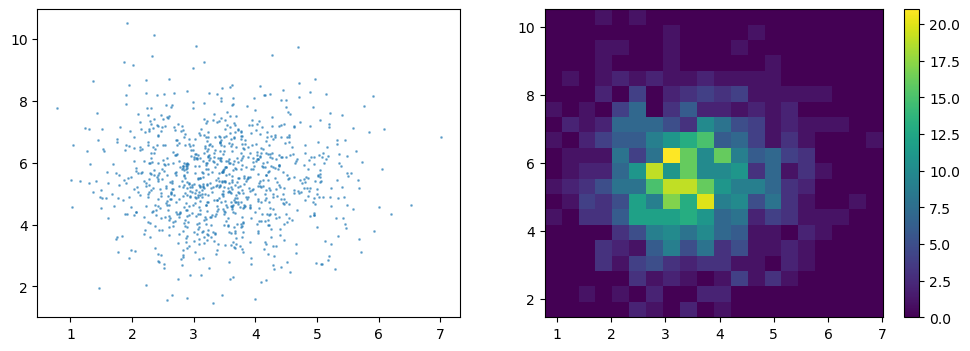

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# 生成数据
# np.random.seed(42)
true_mean = np.array([3.5, 5.5])
# true_cov = np.array([[1, 0.5], [0.5, 2]])
true_cov = np.array([[1, 0], [0, 2]])
n_samples = 1000
data = np.random.multivariate_normal(true_mean, true_cov, size=n_samples)
noise_ratio = 0.1
data += noise_ratio * np.random.rand(n_samples, 2) - 0.5 * noise_ratio  # 加入噪声

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], alpha=0.5, s=1)
plt.subplot(122)
plt.hist2d(data[:,0], data[:,1], bins=20)
plt.colorbar()


You must install the tqdm library to use progress indicators with emcee


Running MCMC...


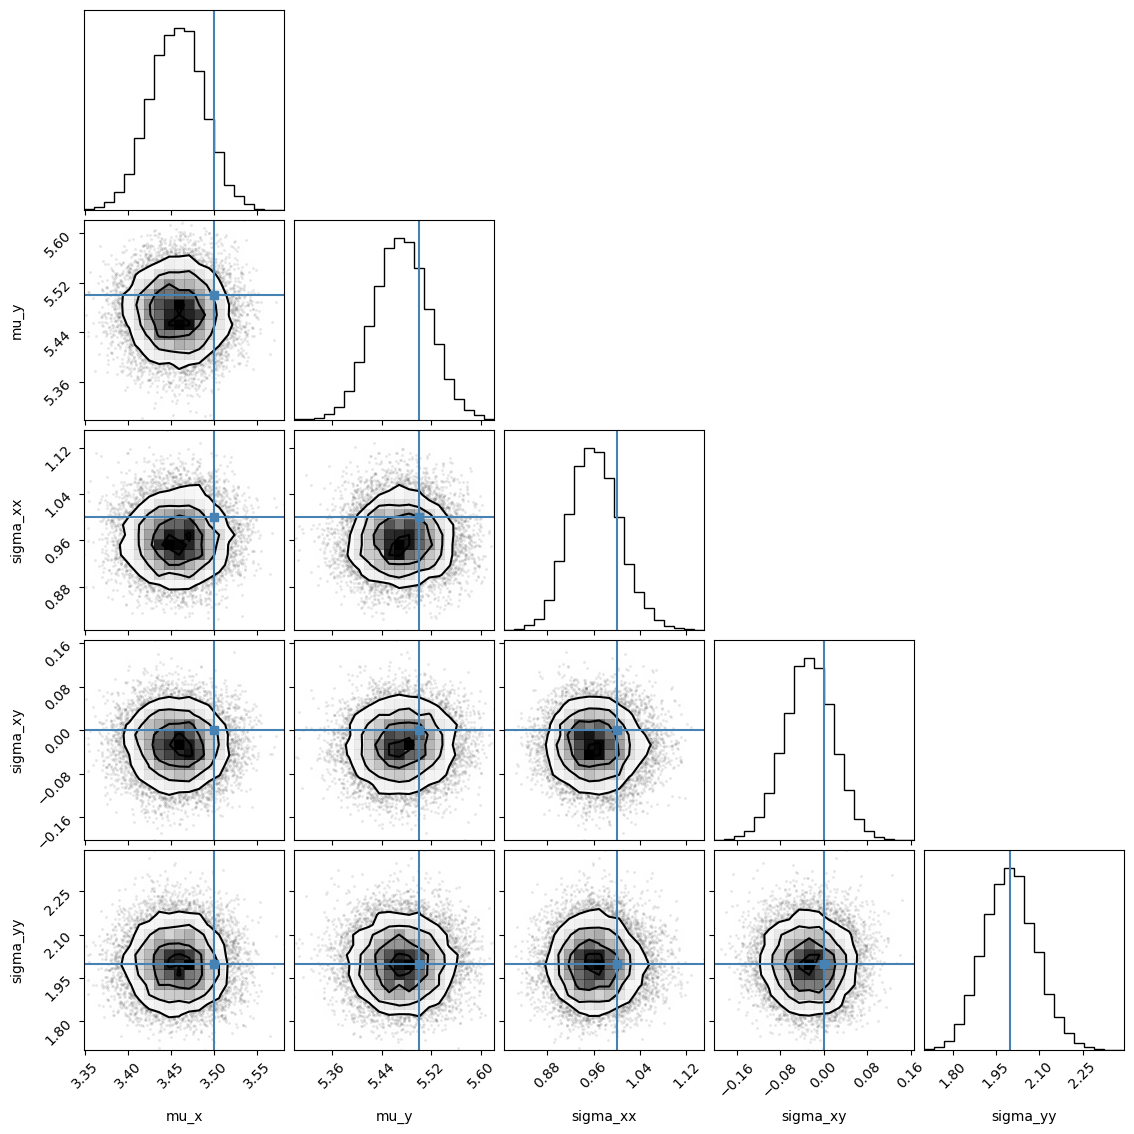

Estimated Parameters:
mu_x: 3.457, mu_y: 5.472
sigma_xx: 0.963, sigma_xy: -0.027, sigma_yy: 2.000


In [71]:
# 定义二维高斯的对数似然函数
def log_likelihood(params, data):
    mu_x, mu_y, sigma_xx, sigma_xy, sigma_yy = params
    mean = np.array([mu_x, mu_y])
    cov = np.array([[sigma_xx, sigma_xy], [sigma_xy, sigma_yy]])
    
    # 协方差矩阵需要正定
    if np.linalg.det(cov) <= 0:
        return -np.inf
    
    diff = data - mean
    inv_cov = np.linalg.inv(cov)
    log_likelihood = -0.5 * np.sum(np.einsum('ij,jk,ik->i', diff, inv_cov, diff))
    log_likelihood -= 0.5 * len(data) * np.log(2 * np.pi)
    log_likelihood -= 0.5 * len(data) * np.log(np.linalg.det(cov))
    return log_likelihood

# 定义参数的先验分布
def log_prior(params):
    mu_x, mu_y, sigma_xx, sigma_xy, sigma_yy = params
    if sigma_xx <= 0 or sigma_yy <= 0:  # 方差必须为正
        return -np.inf
    if np.linalg.det(np.array([[sigma_xx, sigma_xy], [sigma_xy, sigma_yy]])) <= 0:
        return -np.inf
    return 0  # 假设均匀先验

# 定义目标概率密度函数（Posterior = Likelihood * Prior）
def log_posterior(params, data):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, data)

# 初始化参数
n_dim = 5  # 参数维度：mu_x, mu_y, sigma_xx, sigma_xy, sigma_yy
n_walkers = 32  # Walker数量
initial_guess = [3, 5, 1, 0, 2]  # 初始参数
initial_positions = [initial_guess + 0.1 * np.random.randn(n_dim) for _ in range(n_walkers)]

# 创建采样器
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(data,))

# 运行采样
n_steps = 5000
print("Running MCMC...")
sampler.run_mcmc(initial_positions, n_steps, progress=True)

# 获取采样结果
samples = sampler.get_chain(discard=1000, thin=10, flat=True)  # 丢弃前1000步，间隔10步采样

# 提取结果
mu_x_samples = samples[:, 0]
mu_y_samples = samples[:, 1]
sigma_xx_samples = samples[:, 2]
sigma_xy_samples = samples[:, 3]
sigma_yy_samples = samples[:, 4]

# 绘制角图（Corner Plot）
import corner
fig = corner.corner(
    samples,
    labels=["mu_x", "mu_y", "sigma_xx", "sigma_xy", "sigma_yy"],
    truths=[true_mean[0], true_mean[1], true_cov[0, 0], true_cov[0, 1], true_cov[1, 1]]
)
plt.show()

# 打印拟合结果
mean_mu_x = np.mean(mu_x_samples)
mean_mu_y = np.mean(mu_y_samples)
mean_sigma_xx = np.mean(sigma_xx_samples)
mean_sigma_xy = np.mean(sigma_xy_samples)
mean_sigma_yy = np.mean(sigma_yy_samples)

print("Estimated Parameters:")
print(f"mu_x: {mean_mu_x:.3f}, mu_y: {mean_mu_y:.3f}")
print(f"sigma_xx: {mean_sigma_xx:.3f}, sigma_xy: {mean_sigma_xy:.3f}, sigma_yy: {mean_sigma_yy:.3f}")
